In [ ]:
#install.packages("SuperLearner")
#install.packages("ranger")
#install.packages("arm")
#install.packages("kernlab")
#install.packages("ipred")

In [2]:
library(SuperLearner)
library(MASS)
library(dplyr)

Warning message:
"package 'SuperLearner' was built under R version 3.6.3"Loading required package: nnls
Super Learner
Version: 2.0-26
Package created on 2019-10-27

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following object is masked from 'package:MASS':

    select

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [3]:
train <- Pima.tr
test <- Pima.te

In [4]:
head(train)

npreg,glu,bp,skin,bmi,ped,age,type
5,86,68,28,30.2,0.364,24,No
7,195,70,33,25.1,0.163,55,Yes
5,77,82,41,35.8,0.156,35,No
0,165,76,43,47.9,0.259,26,No
0,107,60,25,26.4,0.133,23,No
5,97,76,27,35.6,0.378,52,Yes


In [5]:
labels <- as.numeric(train$type) - 1 
labels_test <- as.numeric(test$type) - 1

In [6]:
length(labels)

[1] 200

In [7]:
dim(train)

[1] 200   8

In [8]:
train <- train %>% select(-type) %>% as.data.frame()
test <- test %>% select(-type)%>% as.data.frame()

In [9]:
listWrappers()

All prediction algorithm wrappers in SuperLearner:



 [1] "SL.bartMachine"      "SL.bayesglm"         "SL.biglasso"        
 [4] "SL.caret"            "SL.caret.rpart"      "SL.cforest"         
 [7] "SL.earth"            "SL.extraTrees"       "SL.gam"             
[10] "SL.gbm"              "SL.glm"              "SL.glm.interaction" 
[13] "SL.glmnet"           "SL.ipredbagg"        "SL.kernelKnn"       
[16] "SL.knn"              "SL.ksvm"             "SL.lda"             
[19] "SL.leekasso"         "SL.lm"               "SL.loess"           
[22] "SL.logreg"           "SL.mean"             "SL.nnet"            
[25] "SL.nnls"             "SL.polymars"         "SL.qda"             
[28] "SL.randomForest"     "SL.ranger"           "SL.ridge"           
[31] "SL.rpart"            "SL.rpartPrune"       "SL.speedglm"        
[34] "SL.speedlm"          "SL.step"             "SL.step.forward"    
[37] "SL.step.interaction" "SL.stepAIC"          "SL.svm"             
[40] "SL.template"         "SL.xgboost"         



All screening algorithm wrappers in SuperLearner:



[1] "All"
[1] "screen.corP"           "screen.corRank"        "screen.glmnet"        
[4] "screen.randomForest"   "screen.SIS"            "screen.template"      
[7] "screen.ttest"          "write.screen.template"


In [10]:
set.seed(42)
model <- SuperLearner(labels,
                     train,
                     family = binomial(),
                     SL.library = list("SL.ranger", "SL.bayesglm", "SL.ksvm", "SL.ipredbagg"))
model

Loading required namespace: arm
Loading required namespace: ipred
Loading required namespace: ranger
Loading required namespace: kernlab



Call:  
SuperLearner(Y = labels, X = train, family = binomial(), SL.library = list("SL.ranger",  
    "SL.bayesglm", "SL.ksvm", "SL.ipredbagg")) 


                      Risk      Coef
SL.ranger_All    0.1752675 0.0000000
SL.bayesglm_All  0.1616847 0.6463858
SL.ksvm_All      0.1762921 0.0000000
SL.ipredbagg_All 0.1656591 0.3536142

In [11]:
set.seed(42)

cv.model <- CV.SuperLearner(labels,
                         train,
                         V = 5,
                         SL.library = list("SL.ranger", "SL.bayesglm", "SL.ksvm", "SL.ipredbagg"))
summary(cv.model)


Call:  
CV.SuperLearner(Y = labels, X = train, V = 5, SL.library = list("SL.ranger",  
    "SL.bayesglm", "SL.ksvm", "SL.ipredbagg")) 

Risk is based on: Mean Squared Error

All risk estimates are based on V =  5 

        Algorithm     Ave       se     Min     Max
    Super Learner 0.15807 0.013809 0.10887 0.22300
      Discrete SL 0.15932 0.013537 0.10541 0.22403
    SL.ranger_All 0.16685 0.014592 0.13581 0.22227
  SL.bayesglm_All 0.15932 0.013537 0.10541 0.22403
      SL.ksvm_All 0.18353 0.019427 0.13064 0.25517
 SL.ipredbagg_All 0.16147 0.015336 0.12413 0.22658

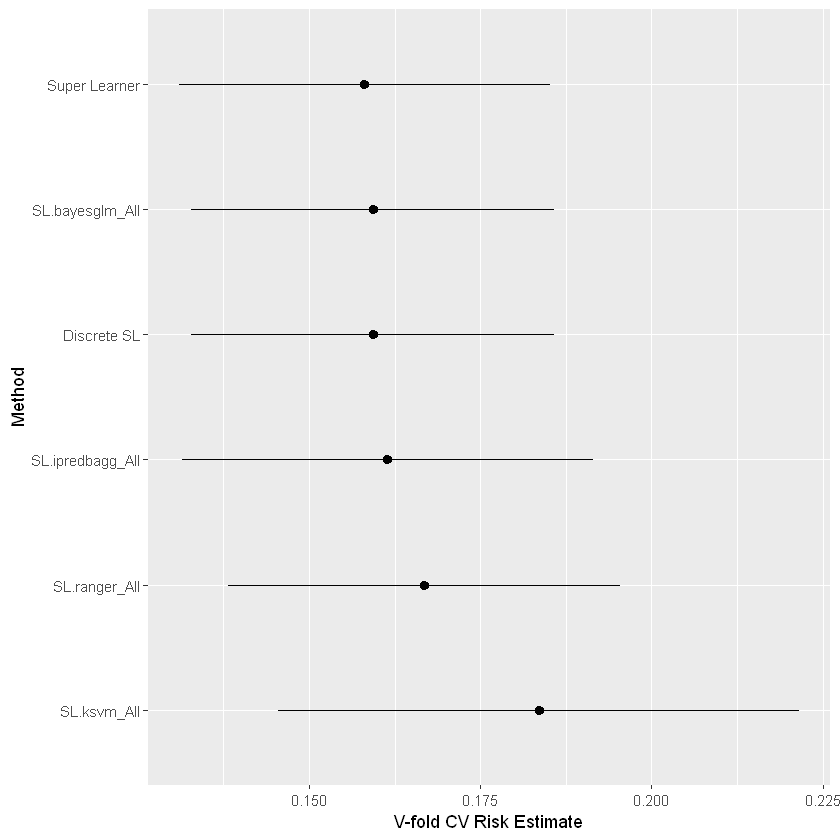

In [12]:
plot(cv.model)

In [13]:
pred <- predict.SuperLearner(model , newdata = test)

In [14]:
head(pred$pred)

0.78131164
0.09426887
0.04256482
0.05714902
0.70774537
0.64838482


In [15]:
head(pred$library)

SL.ranger_All,SL.bayesglm_All,SL.ksvm_All,SL.ipredbagg_All
0.804,0.75698375,0.8833113,0.82578156
0.113,0.04487688,0.1230686,0.18455450
0.026,0.02845282,0.1258690,0.06836071
0.106,0.04488741,0.1617065,0.07956253
0.626,0.79146612,0.7584997,0.55470882
0.526,0.72260101,0.7628080,0.51272203


In [16]:
conv.preds <- ifelse(pred$pred>=0.5,1,0)

In [17]:
conf_mat <- base::table(conv.preds,labels_test)

In [18]:
conf_mat

          labels_test
conv.preds   0   1
         0 199  44
         1  24  65

In [19]:
cat("Model accuracy is :", sum(diag(conf_mat)/sum(conf_mat)) )

Model accuracy is : 0.7951807

In [20]:
#With the same data set, I got 72% accuracy with only KNN.